# BLS MSA stats

By Andy Wheeler

See blog post, [Use circles instead of choropleth for MSAs](https://andrewpwheeler.com/2022/03/13/use-circles-instead-of-choropleth-for-msas/) for overview.

This scrapes the data from BLS website for particular employment codes.

In [1]:
# Creating example bls maps
from bls_geo import *

# can check out https://www.bls.gov/oes/current/oes_stru.htm
# or use this function
os_cats = ocodes()
os_cats

,OCode,Desc
0,110000,Management Occupations
1,111011,Chief Executives
2,111021,General and Operations Managers
3,111031,Legislators
4,112011,Advertising and Promotions Managers
...,...,...
847,537072,"Pump Operators, Except Wellhead Pumpers"
848,537073,Wellhead Pumpers
849,537081,Refuse and Recyclable Material Collectors
850,537121,"Tank Car, Truck, and Ship Loaders"


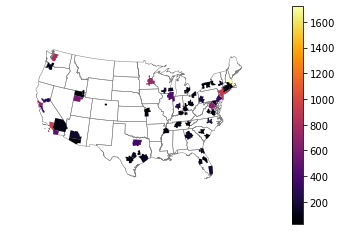

In [2]:
# can check out https://www.bls.gov/oes/current/oes_stru.htm
bio = '172031'
bio_stats = oes_geo(bio)
areas = get_areas() # this takes a few minutes
state = state_albers()
geo_bio = merge_occgeo(bio_stats,areas)

ax = geo_bio.plot(column='Employment',cmap='inferno',legend=True,zorder=2)
state.boundary.plot(ax=ax,color='grey',linewidth=0.5,zorder=1)
ax.set_ylim(0.1*1e6,3.3*1e6)
ax.set_xlim(-0.3*1e7,0.3*1e7)   # lower 48 focus (for Albers proj)
ax.set_axis_off()
plt.show()

In [3]:
# Can export to excel (csv parsing is tough, maybe use tsv instead)
bio_stats.to_excel('biojobs.xlsx')

att = ['areaName','Employment','Location Quotient','Employment per 1,000 jobs','Annual mean wage']
form = ['',',.0f','.2f','.2f',',.0f']

map_bio = fol_map(geo_bio,'Employment',['lat', 'lon'],att,form)
#map_bio.save('biomap.html')
map_bio

In [4]:
# Data science jobs
ds = '152051'
ds_stats = oes_geo(ds)
geo_ds = merge_occgeo(ds_stats,areas)
geo_ds.sort_values(by='Employment',inplace=True,ascending=False)
lim_fields = ['areaName','Employment','Annual mean wage','Annual 75th percentile wage']
geo_ds[lim_fields].head(10)

,areaName,Employment,Annual mean wage,Annual 75th percentile wage
120,"New York-Newark-Jersey City, NY-NJ-PA",13860,136040.0,168040.0
156,"San Francisco-Oakland-Hayward, CA",8890,152080.0,175580.0
102,"Los Angeles-Long Beach-Anaheim, CA",7160,120290.0,147990.0
191,"Washington-Arlington-Alexandria, DC-VA-MD-WV",6720,126160.0,164530.0
33,"Chicago-Naperville-Elgin, IL-IN-WI",5100,110800.0,132900.0
44,"Dallas-Fort Worth-Arlington, TX",5040,108090.0,135290.0
157,"San Jose-Sunnyvale-Santa Clara, CA",4940,233320.0,NaN
10,"Atlanta-Sandy Springs-Roswell, GA",4480,110670.0,134990.0
132,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",3680,109460.0,135590.0
165,"Seattle-Tacoma-Bellevue, WA",3610,142810.0,174640.0
